In [440]:
import numpy as np
import matplotlib.pyplot as plt

def bernstein_evaluation(b, x_bar):
    n = len(b)
    B = np.zeros((n,n))
   
    B[0][0] = 1.
    for i in range(1,n):
        for j in range(i+1):
            if j == 0:
                B[i][j] = (1-x_bar) * B[i-1][j]
            elif j == i:
                B[i][j] = x_bar * B[i-1][j-1]
            else:
                B[i][j] = x_bar * B[i-1][j-1] + (1-x_bar)*B[i-1][j]
                
    return sum([b[i] * B[n-1][i] for i in range(n)])

def de_casteljau(b, x_bar):
    if len(b) == 1:
        return b[0]
    
    b_new = []
    for i in range(len(b)-1):
        b_new.append(x_bar * b[i+1] + (1-x_bar) * b[i])
    
    return de_casteljau(b_new, x_bar)

In [441]:
import unittest

class TestConvert(unittest.TestCase):
    def test_bernstein_evaluation(self):
        b =[2,-2,2]
        self.assertEqual(bernstein_evaluation(b,0), 2)
        self.assertEqual(bernstein_evaluation(b,0.25), 0.5)
        self.assertEqual(bernstein_evaluation(b,0.5), 0.)
        self.assertEqual(bernstein_evaluation(b,0.75), 0.5)
        self.assertEqual(bernstein_evaluation(b,0.1), 1.28)
        self.assertEqual(bernstein_evaluation(b,1), 2)
        
    def test_de_casteljau(self):
        b =[2,-2,2]
        self.assertEqual(de_casteljau(b,0), 2)
        self.assertEqual(de_casteljau(b,0.25), 0.5)
        self.assertEqual(de_casteljau(b,0.5), 0.)
        self.assertEqual(de_casteljau(b,0.75), 0.5)
        # self.assertEqual(de_casteljau(b,0.1), 1.28) # errore numerico
        self.assertEqual(de_casteljau(b,1), 2)
        
def run_tests(test_class):
    suite = unittest.TestLoader().loadTestsFromTestCase(test_class)
    unittest.TextTestRunner(verbosity=2).run(suite)
    
run_tests(TestConvert)

test_bernstein_evaluation (__main__.TestConvert.test_bernstein_evaluation) ... ok
test_de_casteljau (__main__.TestConvert.test_de_casteljau) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


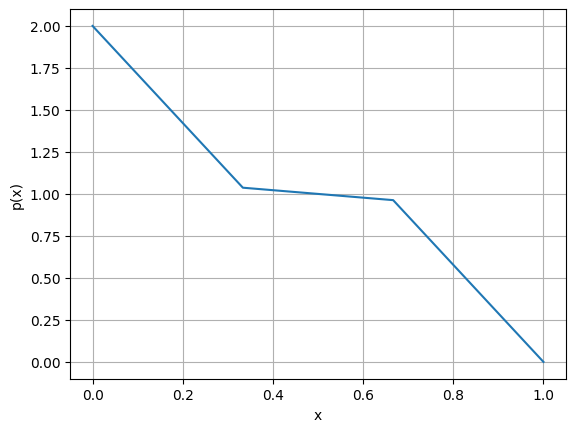

In [450]:
b = [2,0,2,0]
points = [0, 1/3, 1/2, 2/3, 1]
y = [bernstein_evaluation(b,x) for x in points]
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.plot(points, y)
plt.show()